<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
T = 120/365
N = 1_000
M = 10_000
K1 = 80
K2 = 100
dt = T / N
r = 0.04
sigma = 0.2
P0 = 100
z = np.random.standard_normal(size=(N, M))
dW = z * np.sqrt(dt)
dX = (r -0.5 * sigma ** 2 ) * dt + sigma * dW
X = dX.cumsum(0) # sum over dimension 0
X = np.concatenate((np.zeros((1, M)), X))
P = P0 * np.exp(X)

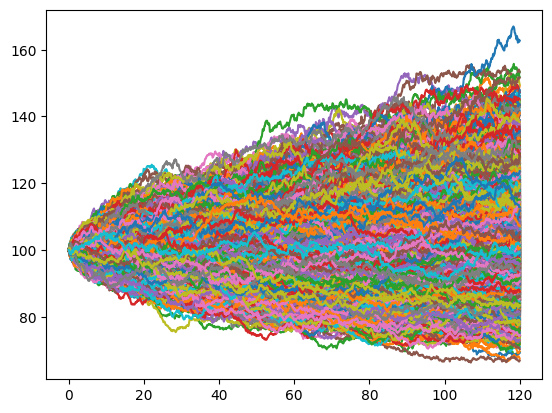

In [8]:
t = np.linspace(0, T*365, N+1)
for m in range(M):
  plt.plot(t, P[:, m])

In [9]:
def pay_off(p,K1, K2):
  term = 2.0*(K2-p)
  payoff = term*(p<=K2) *(p>K1)
  return payoff

Text(0, 0.5, 'Payoff')

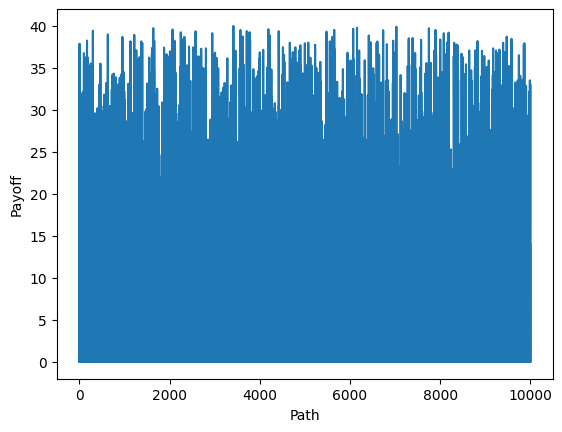

In [35]:
option_payoff = pay_off(P[-1,:], K1, K2)
plt.plot(option_payoff)
plt.xlabel("Path")
plt.ylabel("Payoff")

In [12]:
avg_payoff = option_payoff.mean()
discounted_payoff = avg_payoff * np.exp(-r * T)
print(f"Average Payoff at T: {avg_payoff:0.3f}")
print(f"Discounted Payoff at 0: {discounted_payoff:0.3f}")

Average Payoff at T: 6.861
Discounted Payoff at 0: 6.772


# European Put Option
S: current asset price
K: Strike Price
T: time to expiration
sigma: asset volatility
r: risk-free interest

In [16]:
def european_put(S,K,T,sigma,r):
  d1 = np.log(S/K) + (r + 0.5 * sigma ** 2)*T
  d1 = d1/(sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  price = K*np.exp(-r * T) *norm.cdf(-d2) - S *norm.cdf(-d1)
  return price

European Binary Put Option

In [32]:
def binaryPut(S, K, T, sigma, r):
  d2 = np.log(S/K) + (r - 0.5 * sigma ** 2)*T
  d2 = d2/(sigma * np.sqrt(T))
  return np.exp(-r * T)*norm.cdf(-d2)

In [34]:
option_price = (2 * european_put(S=P0, K=K2, T=T, sigma=sigma, r=r) -
                2 * european_put(S=P0, K=K1, T=T, sigma=sigma, r=r) -
                2* (K2-K1) * binaryPut(S=P0,K= K1,T=T, sigma=sigma,r=r))
print(f"Theretical Put Option Value at t=0: {option_price  :0.3f}")

Theretical Put Option Value at t=0: 6.800
